Stage structured population model of sea turtles

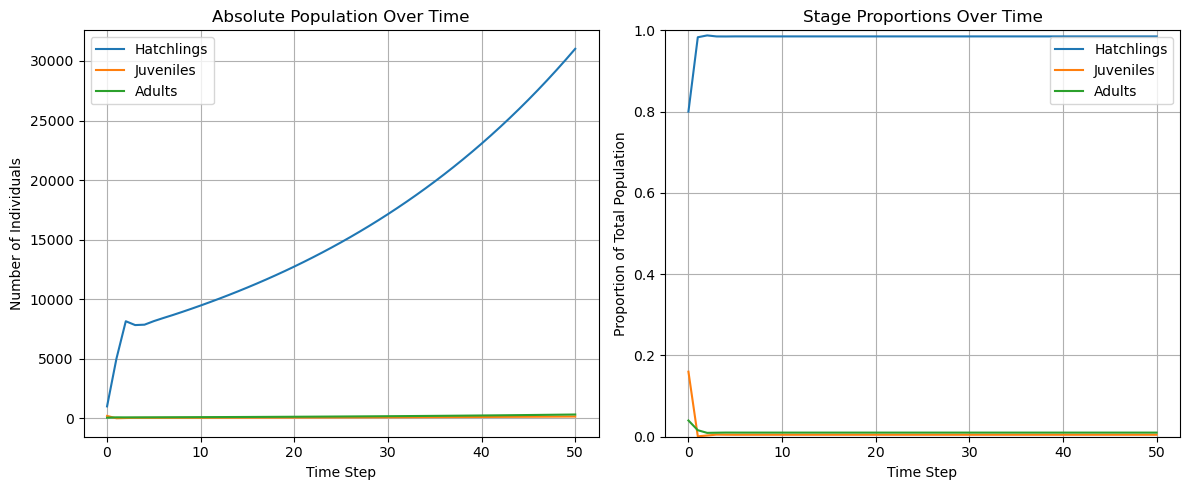


Final turtle population at last time step:
Hatchlings: 31022.98
Juveniles:  150.58
Adults:     319.57
Total:      31493.13


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define G (growth), P (survival in stage), F (fecundity) ---

# Turtle model:
# Stages: [Hatchlings, Juveniles, Adults]

G1 = 0.005   # Hatchlings → Juveniles (e.g. 0.1 survival × 0.05 transition)
G2 = 0.17    # Juveniles → Adults   (e.g. 0.85 survival × 0.2 transition)
P3 = 0.95    # Adults → Adults
F  = 100     # Adults → Hatchlings

# --- 2. Construct the Lefkovitch matrix ---

A = np.array([
    [0.0,  0.0,  F],   # Fecundity
    [G1,  0.0,  0.0],  # Hatchlings → Juveniles
    [0.0, G2,  P3]     # Juveniles → Adults, Adults survive
])

# --- 3. Initial population vector ---
population = np.array([1000, 200, 50])  # [Hatchlings, Juveniles, Adults]

# --- 4. Simulation settings ---
timesteps = 51
pop_history = np.zeros((timesteps, 3))         # Absolute numbers
prop_history = np.zeros((timesteps, 3))        # Proportions

pop_history[0] = population
prop_history[0] = population / population.sum()

# --- 5. Run simulation ---
for t in range(1, timesteps):
    population = A @ population
    pop_history[t] = population
    total = population.sum()
    if total > 0:
        prop_history[t] = population / total
    else:
        prop_history[t] = [0, 0, 0]

# --- 6. Plot results ---

plt.figure(figsize=(12, 5))

# (a) Absolute population
plt.subplot(1, 2, 1)
for i, label in enumerate(["Hatchlings", "Juveniles", "Adults"]):
    plt.plot(pop_history[:, i], label=label)
plt.title("Absolute Population Over Time")
plt.xlabel("Time Step")
plt.ylabel("Number of Individuals")
plt.legend()
plt.grid(True)

# (b) Proportional population
plt.subplot(1, 2, 2)
for i, label in enumerate(["Hatchlings", "Juveniles", "Adults"]):
    plt.plot(prop_history[:, i], label=label)
plt.title("Stage Proportions Over Time")
plt.xlabel("Time Step")
plt.ylabel("Proportion of Total Population")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- 7. Print final population numbers ---

final_population = pop_history[-1]
print("\nFinal turtle population at last time step:")
print(f"Hatchlings: {final_population[0]:.2f}")
print(f"Juveniles:  {final_population[1]:.2f}")
print(f"Adults:     {final_population[2]:.2f}")
print(f"Total:      {final_population.sum():.2f}")

- My real world example was stage structures of a sea turtle population
- The result was:
    Hatchlings: 31022.98
    Juveniles:  150.58
    Adults:     319.57
    Total:      31493.13
- Transient behavior: The mix of turtles in each stage changes a lot from the starting numbers. Since adults have a high survivial rate and lay many eggs, the total number of turtles grows fast, and there are mostly hatchlings.
Stable behavior: The population grows steadily at about 6.7% each step. The proportions of turtles in each stage become stable, with most being hatchlings and very few juveniles or adults. The number of turtles keeps growing at the same rate, but the stage proportions don’t change much anymore. Basically, each year turtles will lay a large amount of eggs but the hatchlings have a very low surival rate, which is why the stage 1 is vastly different from 2 and 3.